In [48]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

## Task 1

In [17]:
games_df = pd.read_csv("games.csv")

In [18]:
games_df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [122]:
games_df = games_df[~games_df.isna()]

## Task 2

In [27]:
games_df_full.dtypes
# rank is rank
# name, platform, genre, publisher - nominal
# year - discrete
# everything else - continious

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## Task 3

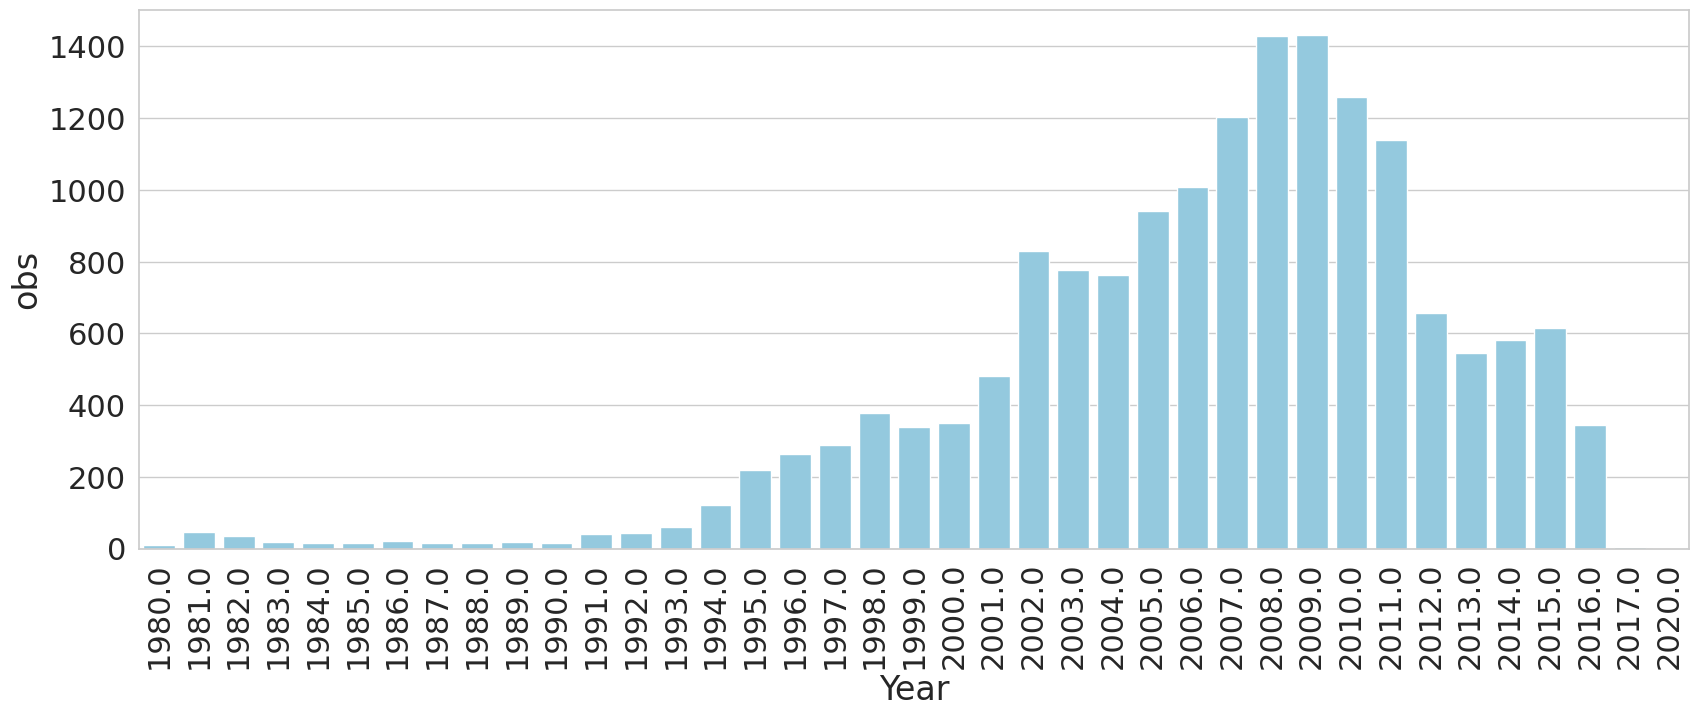

In [51]:
yearly = ( 
    games_df_full
    .groupby("Year", as_index=False)
    .agg(obs = ("Platform", 'count'))
)

sns.barplot(data=yearly, x='Year', y='obs', color='skyblue')
plt.xticks(rotation=90)
plt.show()

# answer 
# 1. Мода равна 2009
# 2. Медианный год больше, чем средний

## Task 4

In [79]:
(
    games_df
    .groupby("Platform", as_index=False)
    .agg(observations = ("Platform", "count"))
    .assign(percent = lambda x: x.observations / x.observations.sum() )
    .sort_values(by = "percent", ascending=False)
    #.filter("percent > 0.07")
)
# DS, PS2, PS3, Wii, X360, PSP, PS

,Platform,observations,percent
4,DS,2163,0.130317
16,PS2,2161,0.130196
17,PS3,1329,0.080070
26,Wii,1325,0.079829
28,X360,1265,0.076214
19,PSP,1213,0.073081
15,PS,1196,0.072057
13,PC,960,0.057838
29,XB,824,0.049645
6,GBA,822,0.049524


## Task 5

In [81]:
(
    games_df
    .groupby("Publisher", as_index=False)
    .agg(observations = ("Platform", "count"))
    .assign(percent = lambda x: x.observations / x.observations.sum() )
    .sort_values(by = "percent", ascending=False)
    #.filter("percent > 0.07")
)
# answer - Electronic Arts

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

## Task 6

In [123]:
(
    games_df
    .query("Publisher == 'Nintendo'")
    [['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
    .describe()
)
# anser - NA_Sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,703.000000,703.000000,703.000000,703.000000
mean,1.161977,0.595647,0.647824,0.135605
std,2.976782,1.736095,1.059476,0.462002
min,0.000000,0.000000,0.000000,0.000000
25%,0.005000,0.000000,0.090000,0.000000
50%,0.370000,0.120000,0.280000,0.030000
75%,0.960000,0.480000,0.730000,0.090000
max,41.490000,29.020000,10.220000,8.460000


## Task 7

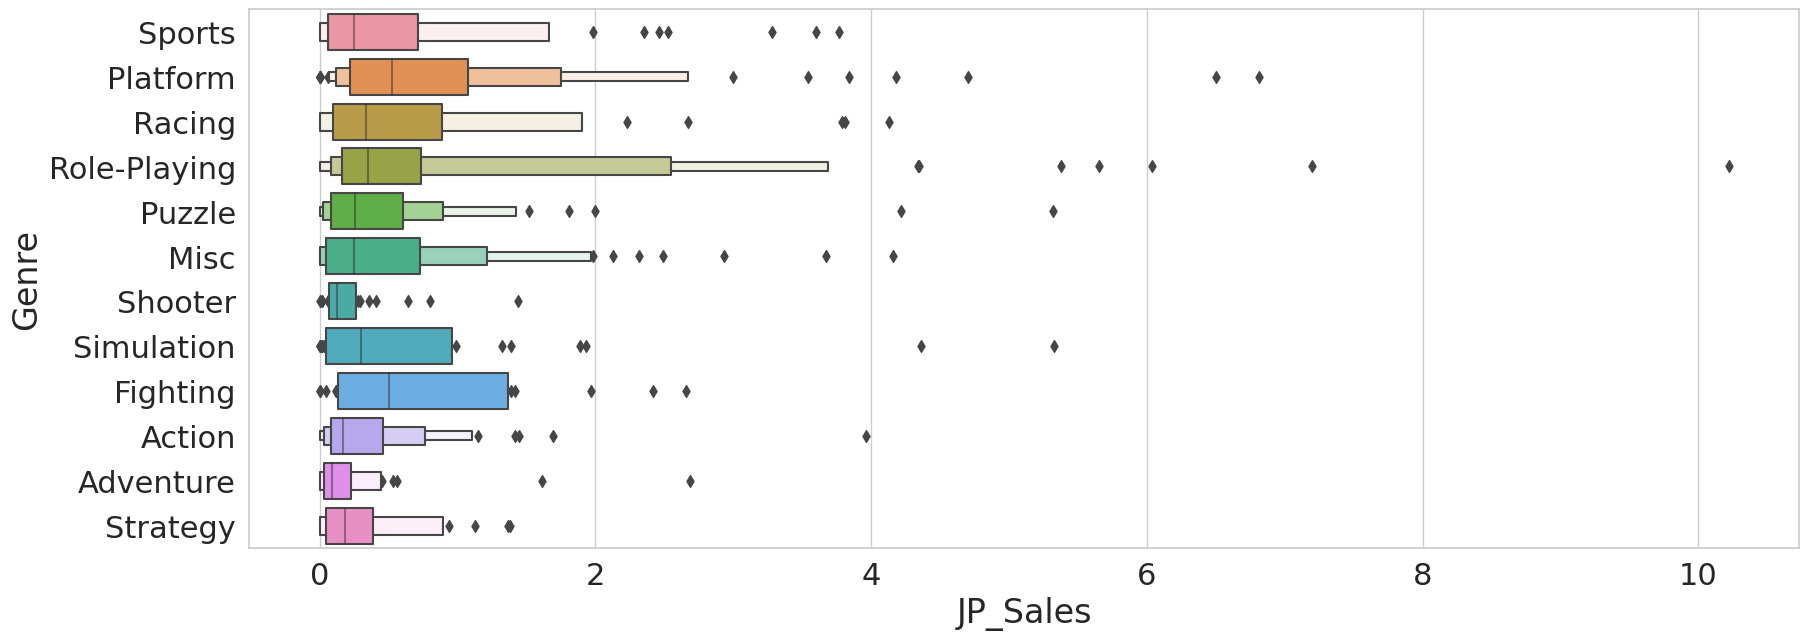

In [124]:
games_df_japan = (
    games_df
    .query("Publisher == 'Nintendo'")
)

sns.boxenplot(data=games_df_japan, y='Genre', x='JP_Sales', orient='h')
plt.show()
# answers
# 1. Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation
# 2. Наибольший межквартильный размах наблюдается у игр жанра Fighting
# 3. Межквартильный размах у Strategy меньше, чем у Puzzle

## Task 8

In [114]:
games_df_nintendo = (
    games_df
    .query("Publisher == 'Nintendo'")
    .query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")
    .groupby(['Year', 'Genre'], as_index=False)
    .agg(Sales = ('Global_Sales', 'sum'))
)

<AxesSubplot: xlabel='Year', ylabel='Sales'>

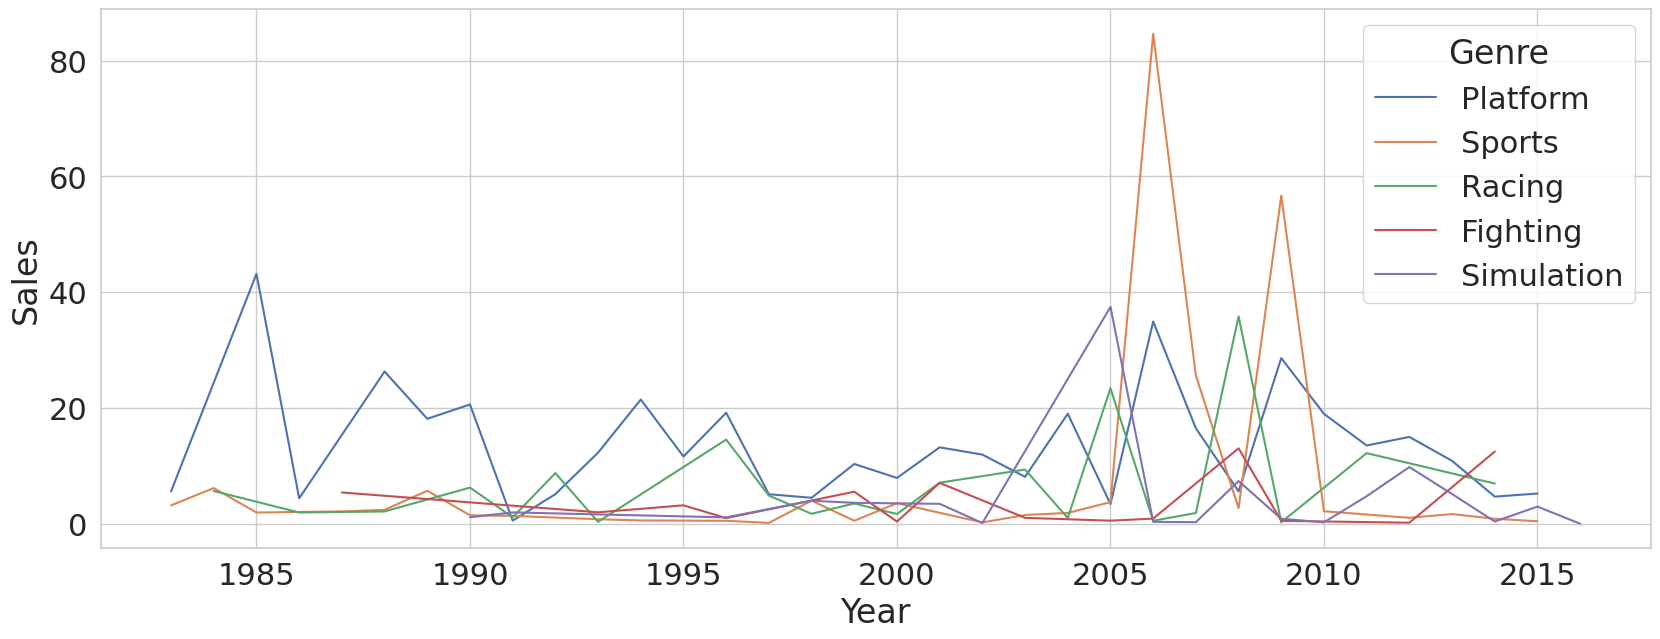

In [119]:
sns.lineplot(data = games_df_nintendo, x = 'Year', y = 'Sales', hue='Genre')
# answer - 2005 – 2010